# Unexplored stuff

## Feature Engineering
- Using ??

In [1]:
from Master import MasterDataframes, ModelTrainer, MLModel

import pandas as pd
import pickle

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)


import warnings
warnings.filterwarnings('ignore')

/Users/miksx/.pyenv/versions/3.11.4/envs/TDT4173/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
M_df = MasterDataframes()

# Training A

In [3]:
trials=10
submission="eleventh"

In [4]:
model_a = ModelTrainer().train_model(location="A", trials=trials)

[I 2023-09-29 19:20:41,365] A new study created in memory with name: regression
[I 2023-09-29 19:20:54,187] Trial 4 finished with value: 21.466889050303436 and parameters: {'objective': 'reg:squarederror', 'eval_metric': 'mae', 'tree_method': 'approx', 'max_depth': 6, 'learning_rate': 0.6050466704791702, 'n_estimators': 385, 'min_child_weight': 5, 'gamma': 0.9313279624045605, 'subsample': 0.95, 'colsample_bytree': 0.8, 'reg_alpha': 0.013183426216138812, 'reg_lambda': 0.5892193345801481, 'random_state': 964}. Best is trial 4 with value: 21.466889050303436.
[I 2023-09-29 19:20:54,489] Trial 0 finished with value: 25.077114818827567 and parameters: {'objective': 'reg:squarederror', 'eval_metric': 'mae', 'tree_method': 'hist', 'max_depth': 8, 'learning_rate': 0.7641049247017194, 'n_estimators': 590, 'min_child_weight': 9, 'gamma': 0.8121705936799608, 'subsample': 0.9, 'colsample_bytree': 0.85, 'reg_alpha': 0.4607006328858148, 'reg_lambda': 0.5069391894277544, 'random_state': 550}. Best is 

R2:  0.9055821660477468
RMSE:  46.330407746045786
graded! MAE:  18.765273353574873
Best params: {
    "objective": "reg:squarederror",
    "eval_metric": "mae",
    "tree_method": "hist",
    "max_depth": 10,
    "learning_rate": 0.2422008053299032,
    "n_estimators": 887,
    "min_child_weight": 9,
    "gamma": 0.5134435118101707,
    "subsample": 0.95,
    "colsample_bytree": 0.6,
    "reg_alpha": 0.8202416061977823,
    "reg_lambda": 0.48285760778948544,
    "random_state": 534
}


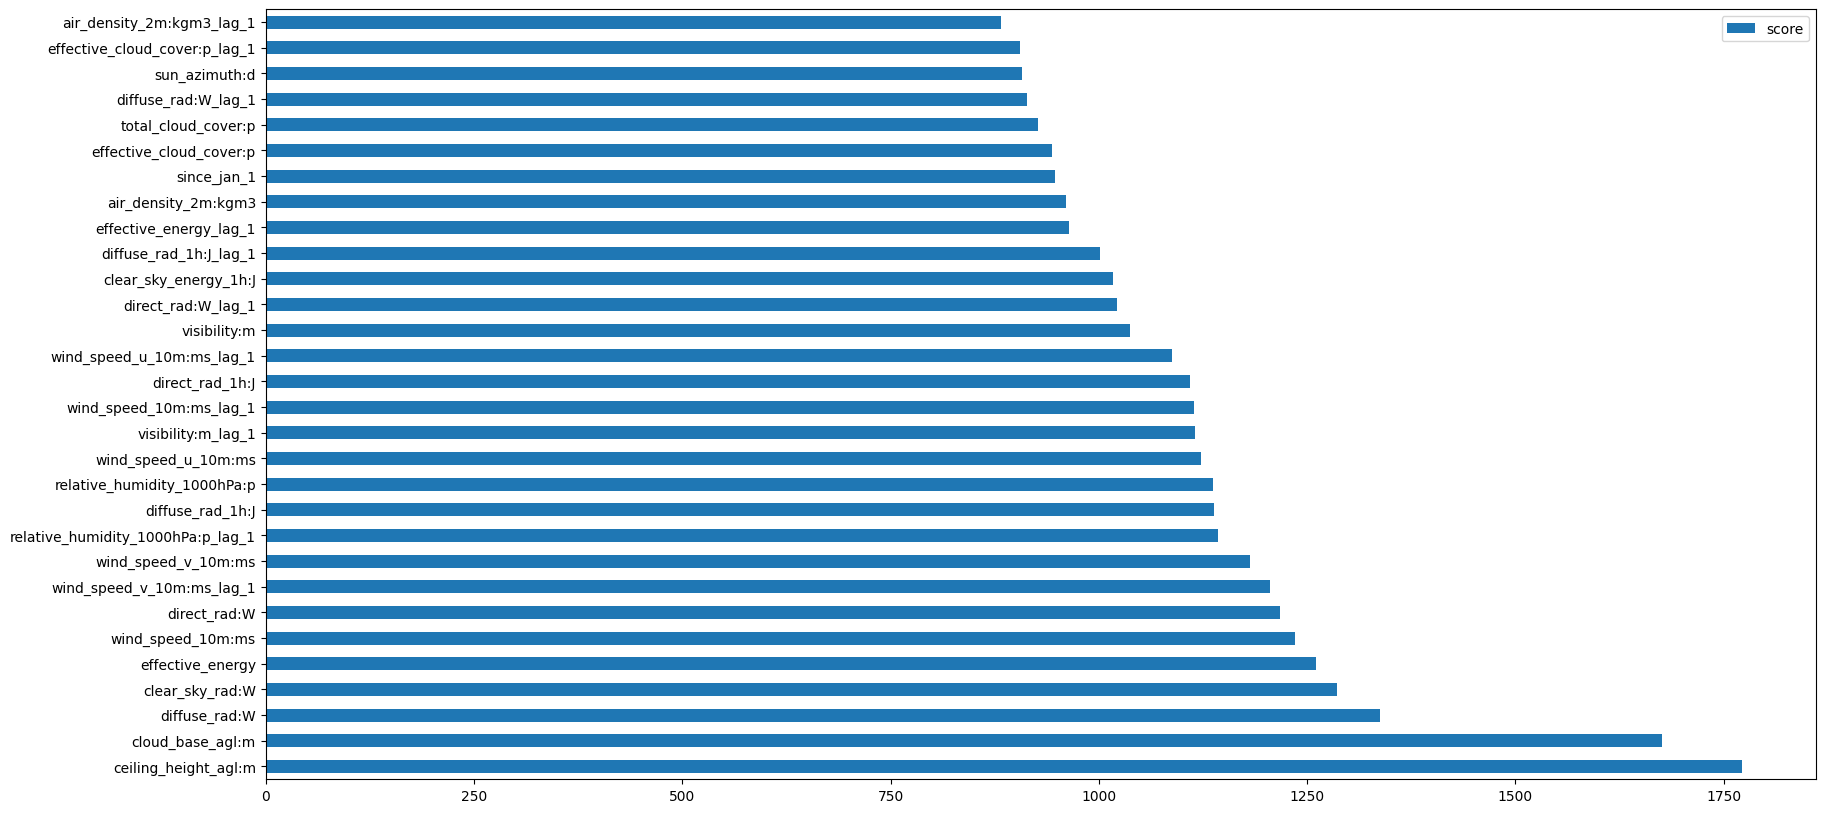

In [5]:
model_a.plot_important_features(top=30)

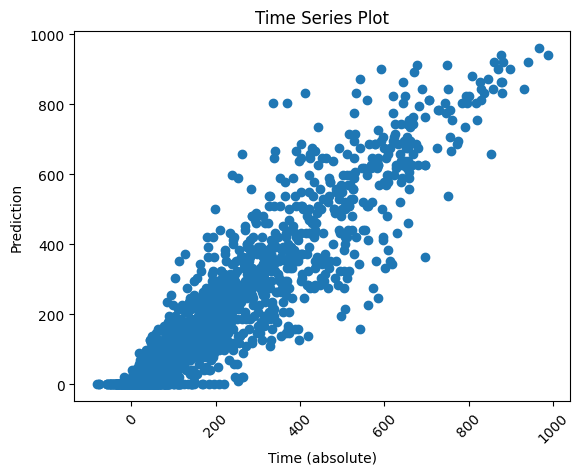

In [6]:
model_a.plot_pred_vs_test()

# Train B

In [7]:
model_b = ModelTrainer().train_model(location="B", trials=trials)

[I 2023-09-29 19:21:17,717] A new study created in memory with name: regression
[I 2023-09-29 19:21:21,026] Trial 5 finished with value: 21.224242945373543 and parameters: {'objective': 'reg:squarederror', 'eval_metric': 'mae', 'tree_method': 'approx', 'max_depth': 5, 'learning_rate': 0.5209827232521475, 'n_estimators': 108, 'min_child_weight': 9, 'gamma': 0.14445521889233973, 'subsample': 0.85, 'colsample_bytree': 0.8, 'reg_alpha': 0.54584197894849, 'reg_lambda': 0.2667221000219484, 'random_state': 577}. Best is trial 5 with value: 21.224242945373543.
[I 2023-09-29 19:21:21,529] Trial 3 finished with value: 21.597680535606838 and parameters: {'objective': 'reg:squarederror', 'eval_metric': 'mae', 'tree_method': 'approx', 'max_depth': 3, 'learning_rate': 0.092238675137558, 'n_estimators': 205, 'min_child_weight': 5, 'gamma': 0.8002389223436999, 'subsample': 0.9, 'colsample_bytree': 1.0, 'reg_alpha': 0.2446345557044263, 'reg_lambda': 0.40451903112412624, 'random_state': 530}. Best is tr

R2:  0.9155007828088785
RMSE:  43.829392251929754
graded! MAE:  16.88079893873046
Best params: {
    "objective": "reg:squarederror",
    "eval_metric": "mae",
    "tree_method": "hist",
    "max_depth": 9,
    "learning_rate": 0.10144525831256893,
    "n_estimators": 531,
    "min_child_weight": 9,
    "gamma": 0.2778818428542609,
    "subsample": 0.7,
    "colsample_bytree": 1.0,
    "reg_alpha": 0.14024046152166533,
    "reg_lambda": 0.5443323666849609,
    "random_state": 880
}


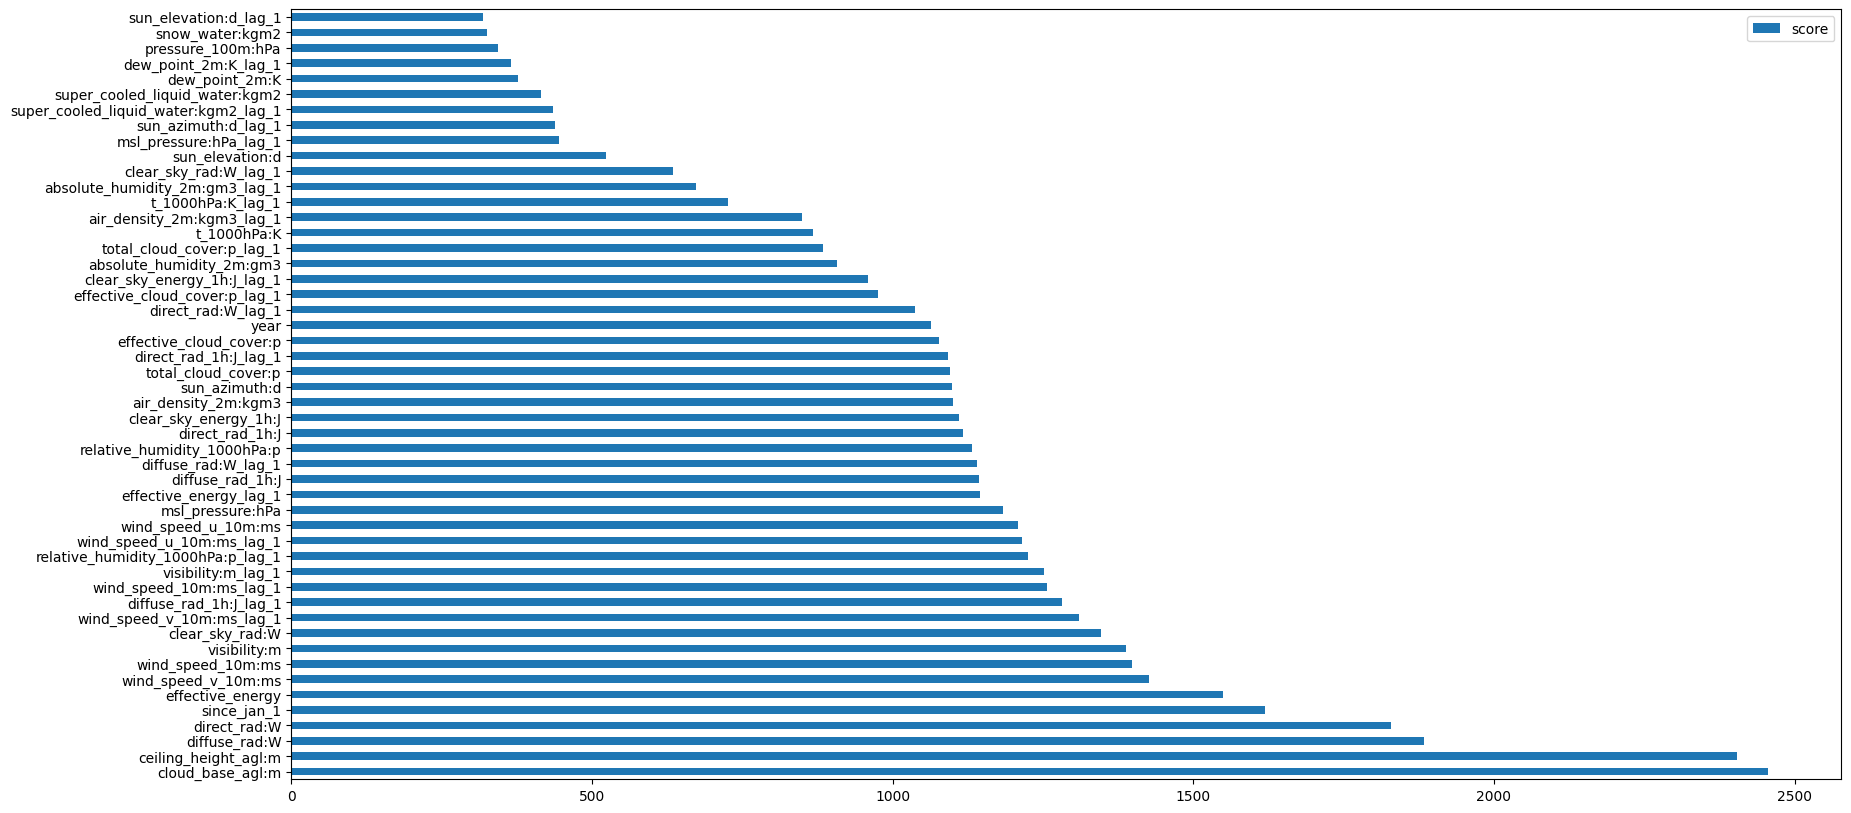

In [8]:
model_b.plot_important_features(50)

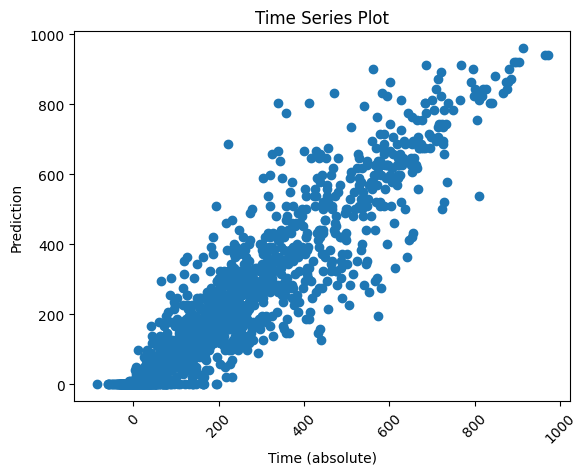

In [9]:
model_b.plot_pred_vs_test()

# Train c

In [10]:
model_c = ModelTrainer().train_model(location="C", trials=trials)

[I 2023-09-29 19:21:48,281] A new study created in memory with name: regression
[I 2023-09-29 19:21:53,833] Trial 5 finished with value: 25.50589238572968 and parameters: {'objective': 'reg:squarederror', 'eval_metric': 'mae', 'tree_method': 'hist', 'max_depth': 5, 'learning_rate': 0.7805760563857618, 'n_estimators': 211, 'min_child_weight': 7, 'gamma': 0.3583927244911216, 'subsample': 0.85, 'colsample_bytree': 1.0, 'reg_alpha': 0.2934094227201563, 'reg_lambda': 0.5297394597508657, 'random_state': 7}. Best is trial 5 with value: 25.50589238572968.
[I 2023-09-29 19:21:56,943] Trial 0 finished with value: 22.384573189616205 and parameters: {'objective': 'reg:squarederror', 'eval_metric': 'mae', 'tree_method': 'approx', 'max_depth': 5, 'learning_rate': 0.44273782470664547, 'n_estimators': 294, 'min_child_weight': 4, 'gamma': 0.5076807146724768, 'subsample': 0.6, 'colsample_bytree': 0.6, 'reg_alpha': 0.7223641282004002, 'reg_lambda': 0.9773242916569477, 'random_state': 579}. Best is trial 

R2:  0.908712163174032
RMSE:  45.555997862121714
graded! MAE:  17.6658311265619
Best params: {
    "objective": "reg:squarederror",
    "eval_metric": "mae",
    "tree_method": "approx",
    "max_depth": 8,
    "learning_rate": 0.12495061873698533,
    "n_estimators": 69,
    "min_child_weight": 1,
    "gamma": 0.6042115437794919,
    "subsample": 0.6,
    "colsample_bytree": 0.8,
    "reg_alpha": 0.9482936702124753,
    "reg_lambda": 0.09383906148661962,
    "random_state": 422
}


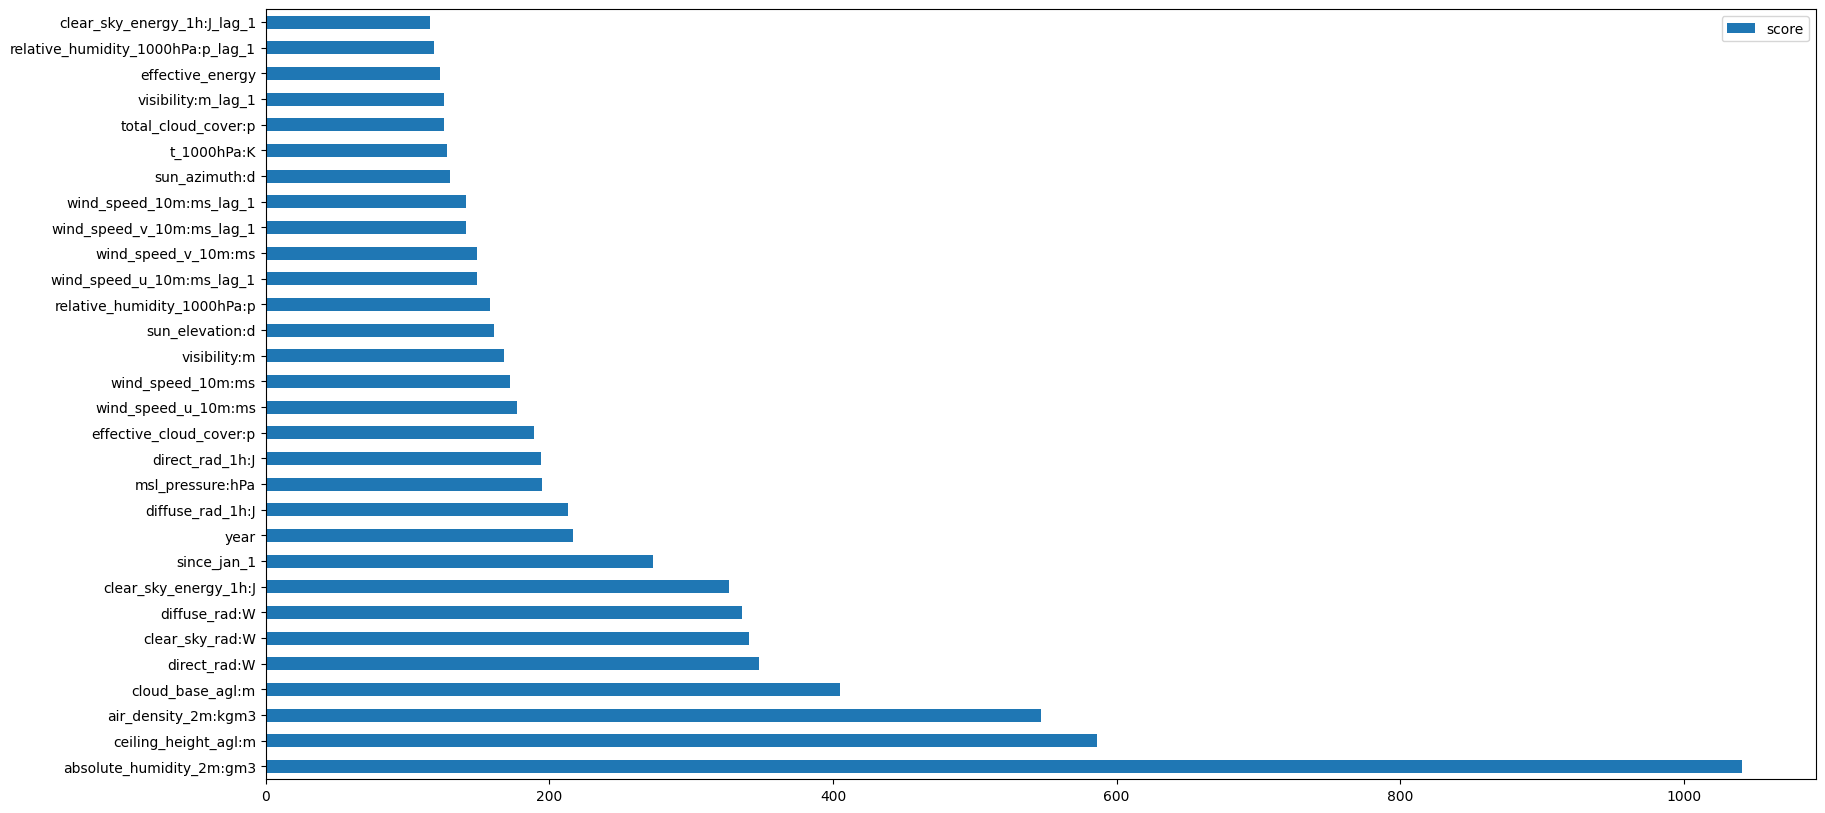

In [11]:
model_c.plot_important_features(30)

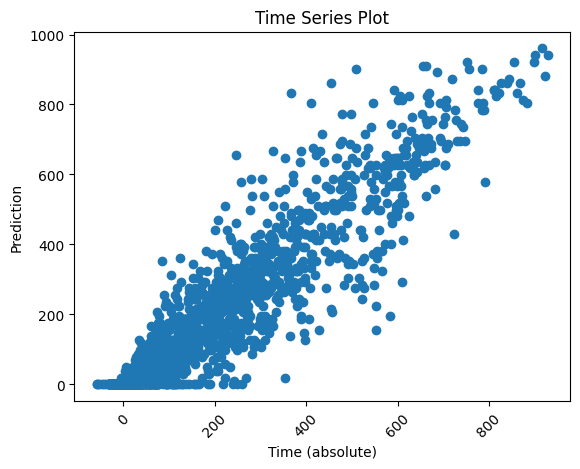

In [12]:
model_c.plot_pred_vs_test()

# Create prediction

In [13]:
y_pred_a = model_a.predict_test_data("A")
print("Length pred: ", len(y_pred_a))
y_pred_b = model_b.predict_test_data("B")
print("Length pred: ", len(y_pred_b))
y_pred_c = model_b.predict_test_data("C")
print("Length pred: ", len(y_pred_c))

predictions = list(y_pred_a) + list(y_pred_b) + list(y_pred_c)

Location A. length: 2880
Length pred:  720
Location B. length: 2880
Length pred:  720
Location C. length: 2880
Length pred:  720


In [14]:
len(predictions)

2160

In [15]:
# df = pd.DataFrame({"prediction":predictions}).rename_axis(index="id")
# df.to_csv(f"submissions/{submission}_submission.csv")

# Predict from pickle_file

In [16]:
# model_a_pickle = pickle.load(open("models/A_xgb_MAE_172_.pkl", "rb"))

In [17]:
# pickle_model = MLModel(model_a_pickle)

In [18]:
# pickle_model.predict_test_data("A")